# Análisis exploratorio de datos - Baubap AI Challenge 2023 
## Por: Rafael Sánchez Cedillo, Francisco Valerio López

### Neural networks challenge

El objetivo consiste en predecir con la mayor precisión la variable objetivo. 
El primer paso entonces sería conocer cuál es la variable objetivo y cuáles son las variables que tienen mayor importancia para generar el modelo de regresión.

In [1]:
#pip install imbalanced-learn

In [2]:
#pip install optuna

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

### Importación y análisis exploratorio de datos

Ideas:

- Utilizar `head()`, `describe()` e `info()`
- Visualizar la distribución de la variable objetivo y de las otras características
- Identificar NaNs y buscar outliers

### Datos de entrenamiento

In [2]:
datos = pd.read_pickle("Data/nn_challenge_train.pkl")

In [3]:
datos.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,target
0,0.554222,1.0,0.0,0.000000,0.398189,0.000000,0.190514,0.774141,0.004995,0.666667,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,1
1,0.521013,0.5,0.0,NaN,0.299222,0.000649,0.000000,0.827157,0.000668,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,1
2,0.545612,1.0,0.0,0.000102,0.248790,0.000000,0.571429,0.851531,0.000604,0.000000,...,0.206293,0.022686,0.000562,0.50000,0.116689,0.566809,0.020597,0.020891,1.0,1
3,0.593774,0.5,0.0,0.000000,0.412052,0.001299,0.087886,0.559571,0.002227,0.333333,...,0.026009,0.074658,0.003375,1.00000,0.025595,0.097360,0.020597,0.002580,0.0,1
4,0.278900,0.0,0.0,0.000000,0.160199,0.009740,0.134400,0.841197,0.000700,0.833333,...,0.049540,0.064444,0.003375,0.85715,0.032973,0.131737,0.020597,0.002613,1.0,1


In [6]:
datos.shape

(472422, 219)

In [7]:
datos.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,target
count,472422.000000,472420.000000,471254.000000,435576.000000,472422.000000,471256.000000,472422.000000,472422.000000,471256.000000,449700.000000,...,472420.000000,472420.000000,472420.000000,472420.000000,472420.000000,472420.000000,472420.000000,472420.000000,471255.000000,472422.000000
mean,0.518669,0.544020,0.004611,0.000691,0.312839,0.015258,0.249711,0.727841,0.001884,0.513358,...,0.080568,0.091190,0.003238,0.584832,0.040472,0.154438,0.057250,0.004895,0.653336,0.859308
std,0.108863,0.324083,0.018434,0.010233,0.112954,0.025510,0.145240,0.110845,0.006095,0.318793,...,0.089586,0.115406,0.009128,0.358869,0.043787,0.123564,0.103643,0.016048,0.475908,0.347704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.445342,0.500000,0.000000,0.000000,0.227816,0.001948,0.152343,0.662139,0.000732,0.333333,...,0.023898,0.020597,0.000562,0.500000,0.024305,0.093145,0.020597,0.001184,0.000000,1.000000
50%,0.518781,0.500000,0.000000,0.000051,0.293266,0.006494,0.228571,0.747226,0.001145,0.500000,...,0.058742,0.049828,0.001687,0.727250,0.035991,0.143492,0.020597,0.002420,1.000000,1.000000
75%,0.592213,1.000000,0.000000,0.000147,0.379608,0.018182,0.326514,0.811302,0.001909,0.750000,...,0.110885,0.123073,0.003937,0.852950,0.051146,0.225993,0.037407,0.004468,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
datos.dtypes.value_counts()

float32     197
float64      10
category      1
category      1
category      1
category      1
category      1
category      1
category      1
object        1
category      1
category      1
category      1
int32         1
dtype: int64

In [5]:
columnas_raras = datos.select_dtypes(include = ['object', 'category']).columns

print(columnas_raras)

Index(['feature_17', 'feature_87', 'feature_118', 'feature_119', 'feature_139',
       'feature_144', 'feature_147', 'feature_148', 'feature_158',
       'feature_159', 'feature_195'],
      dtype='object')


In [6]:
datos_copy = datos.copy()

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

datos_copy[columnas_raras] = datos_copy[columnas_raras].apply(lambda col: le.fit_transform(col))

In [12]:
# columns_drop = datos_copy.select_dtypes(include = ['category', 'object']).columns

# datos_copy.drop(columns = columns_drop, inplace = True)

In [8]:
datos_copy.isnull().sum()

feature_1          0
feature_2          2
feature_3       1168
feature_4      36846
feature_5          0
               ...  
feature_215        2
feature_216        2
feature_217        2
feature_218     1167
target             0
Length: 219, dtype: int64

Buscamos las columnas que únicamente tengan valores NaN

In [9]:
nans = datos_copy.columns[datos_copy.isnull().any()]

In [10]:
nans

Index(['feature_2', 'feature_3', 'feature_4', 'feature_6', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_15', 'feature_16',
       ...
       'feature_209', 'feature_210', 'feature_211', 'feature_212',
       'feature_213', 'feature_214', 'feature_215', 'feature_216',
       'feature_217', 'feature_218'],
      dtype='object', length=174)

Como existen muchos valores NaN no sería conveniente eliminarlas. Una de las técnicas comunes es reemplazarlos con alguna medida de tendencia central. Para datos numéricos suele utilizarse la media o la mediana.

In [11]:
for col in nans:

    datos_copy[col].fillna(datos_copy[col].mean(), inplace = True)

In [12]:
datos_copy.isnull().sum()

feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_215    0
feature_216    0
feature_217    0
feature_218    0
target         0
Length: 219, dtype: int64

### Visualización de datos

<Axes: xlabel='feature_1', ylabel='Count'>

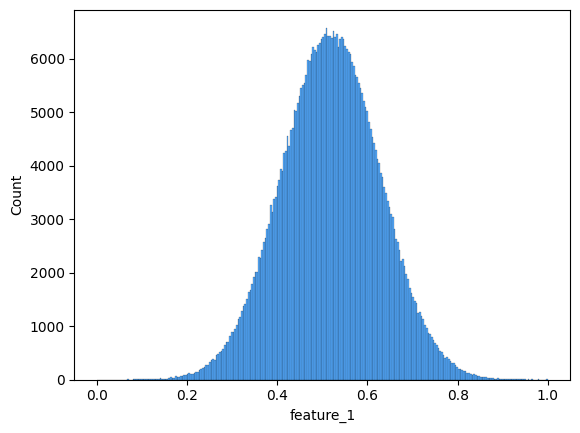

In [18]:
sns.histplot(datos.feature_1, color = 'dodgerblue')

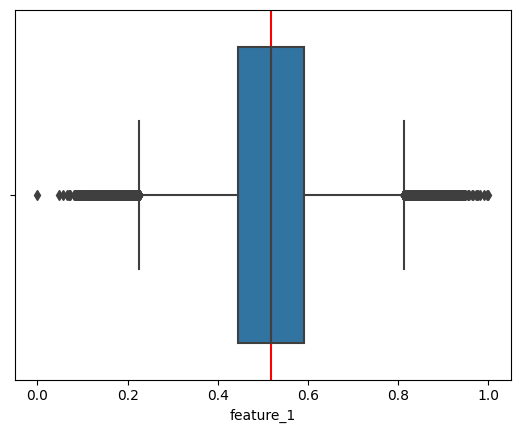

In [19]:
sns.boxplot(x = datos.feature_1)
plt.axvline(datos.feature_1.mean(), color = 'red')

<Axes: xlabel='target', ylabel='Count'>

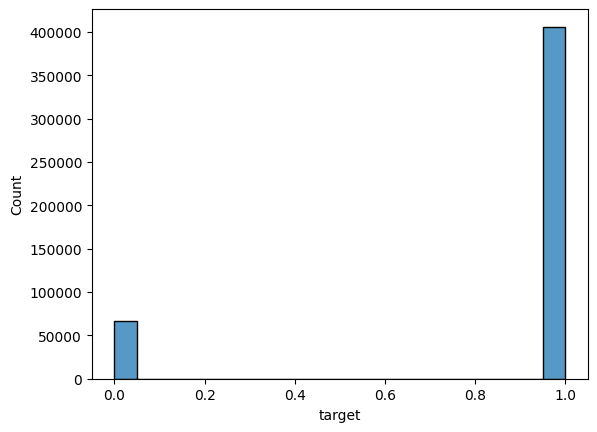

In [20]:
sns.histplot(datos.target)

### Reducción de dimensionalidad

In [21]:
#sns.heatmap(datos.corr())

El heatmap no es una buena opción ya que no es posible identificar con claridad las variables más correlacionadas, intentemos utilizar la matriz de correlación y alguna manera de verificar las variables más correlacionadas

In [22]:
correlation_matrix = datos_copy.corr()

In [23]:
a = 0.85 # umbral de correlación

variables_altamente_corr = []

for i in range(len(correlation_matrix.columns)):

    for j in range(i+1, len(correlation_matrix.columns)):

        if abs(correlation_matrix.iloc[i, j]) >= a:

            variables_altamente_corr.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

In [24]:
variables_altamente_corr

[('feature_9', 'feature_11', 0.9894294346479845),
 ('feature_14', 'feature_137', 0.8651971018290001),
 ('feature_25', 'feature_26', 0.93477691350158),
 ('feature_26', 'feature_38', 0.9060517575257114),
 ('feature_27', 'feature_28', 0.9518331726489971),
 ('feature_29', 'feature_30', 0.94928456720214),
 ('feature_33', 'feature_34', 0.8716511196710012),
 ('feature_56', 'feature_57', 0.9891401071742841),
 ('feature_56', 'feature_62', 0.9335667360874569),
 ('feature_56', 'feature_63', 0.941692527571001),
 ('feature_57', 'feature_62', 0.9393524151586332),
 ('feature_57', 'feature_63', 0.9597020027625263),
 ('feature_62', 'feature_63', 0.9707380873342653),
 ('feature_68', 'feature_69', 0.9945113160056578),
 ('feature_80', 'feature_81', 0.9060304299552833),
 ('feature_88', 'feature_116', 0.9138917422607993),
 ('feature_90', 'feature_92', 0.9489094482419743),
 ('feature_90', 'feature_134', 0.8876976607351302),
 ('feature_90', 'feature_151', 0.9517043663109013),
 ('feature_90', 'feature_169', 0.

In [25]:
print(len(variables_altamente_corr))

131


Eliminamos las variables altamente correlacionadas

In [26]:
columnas_remove = {pair[1] for pair in variables_altamente_corr}

datos_copy.drop(columns = columnas_remove, inplace = True)

In [27]:
datos_copy.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,target
0,0.554222,1.0,0.0,0.000000,0.398189,0.000000,0.190514,0.774141,0.004995,0.666667,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,1
1,0.521013,0.5,0.0,0.000691,0.299222,0.000649,0.000000,0.827157,0.000668,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,1
2,0.545612,1.0,0.0,0.000102,0.248790,0.000000,0.571429,0.851531,0.000604,0.000000,...,0.206293,0.022686,0.000562,0.50000,0.116689,0.566809,0.020597,0.020891,1.0,1
3,0.593774,0.5,0.0,0.000000,0.412052,0.001299,0.087886,0.559571,0.002227,0.333333,...,0.026009,0.074658,0.003375,1.00000,0.025595,0.097360,0.020597,0.002580,0.0,1
4,0.278900,0.0,0.0,0.000000,0.160199,0.009740,0.134400,0.841197,0.000700,0.833333,...,0.049540,0.064444,0.003375,0.85715,0.032973,0.131737,0.020597,0.002613,1.0,1


In [13]:
datos_copy.to_pickle('train_clean_2.pkl')

### Reescalamiento de datos

## Implementación del modelo

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = datos_copy.drop(columns = ['target'])

y = datos_copy['target']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_s = scaler.fit_transform(X_train)
# X_test_s = scaler.fit_transform(X_test)

## Balanceo de datos

In [33]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 'auto')

In [34]:
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [35]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l1, l2, l1_l2

In [36]:
modelo = Sequential()

modelo.add(Dense(128, activation = 'relu', kernel_regularizer = l2(0.01), input_shape = (X_train.shape[1],)))
#modelo.add(Dense(128, activation = 'tanh'))
#modelo.add(Dropout(0.2))
modelo.add(Dense(64, activation = 'relu'))
modelo.add(Dense(32, activation = 'relu'))
modelo.add(Dense(16, activation = 'relu'))
modelo.add(Dropout(0.2))

modelo.add(Dense(1, activation = 'tanh'))

In [37]:
lr = 0.001
optim = Adam(learning_rate = lr)

In [38]:
modelo.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [39]:
history = modelo.fit(X_resampled, y_resampled, epochs = 500, batch_size = 100, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/500
1064/1064 [==============================] - 13s 11ms/step - loss: 1.0018 - accuracy: 0.5116 - val_loss: 0.7607 - val_accuracy: 0.5294
Epoch 2/500
1064/1064 [==============================] - 12s 11ms/step - loss: 0.7352 - accuracy: 0.5196 - val_loss: 0.7405 - val_accuracy: 0.3262
Epoch 3/500
1064/1064 [==============================] - 11s 10ms/step - loss: 0.7067 - accuracy: 0.5182 - val_loss: 0.6988 - val_accuracy: 0.5085
Epoch 4/500
1064/1064 [==============================] - 11s 10ms/step - loss: 0.6991 - accuracy: 0.5144 - val_loss: 0.7257 - val_accuracy: 0.3988
Epoch 5/500
1064/1064 [==============================] - 12s 11ms/step - loss: 0.6955 - accuracy: 0.5139 - val_loss: 0.6573 - val_accuracy: 0.7487
Epoch 6/500
1064/1064 [==============================] - 12s 11ms/step - loss: 0.6935 - accuracy: 0.5224 - val_loss: 0.7087 - val_accuracy: 0.1405
Epoch 7/500
1064/1064 [==============================] - 12s 11ms/step - loss: 0.6936 - accuracy: 0.5101 - val_loss: 0

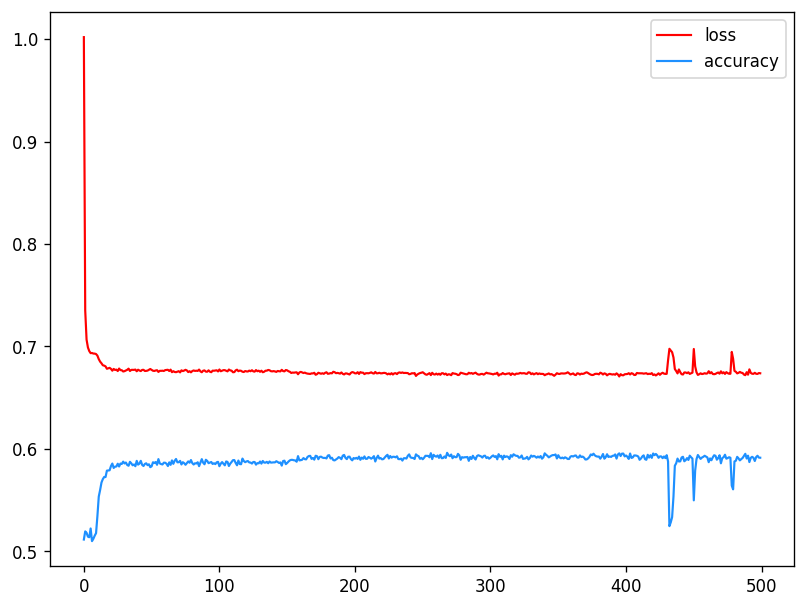

In [40]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), dpi = 120)
ax.plot(history.history['loss'], lw = 1.3, color = 'red', label = 'loss')
ax.plot(history.history['accuracy'], lw = 1.3, color = 'dodgerblue', label = 'accuracy')
ax.legend()
plt.show()

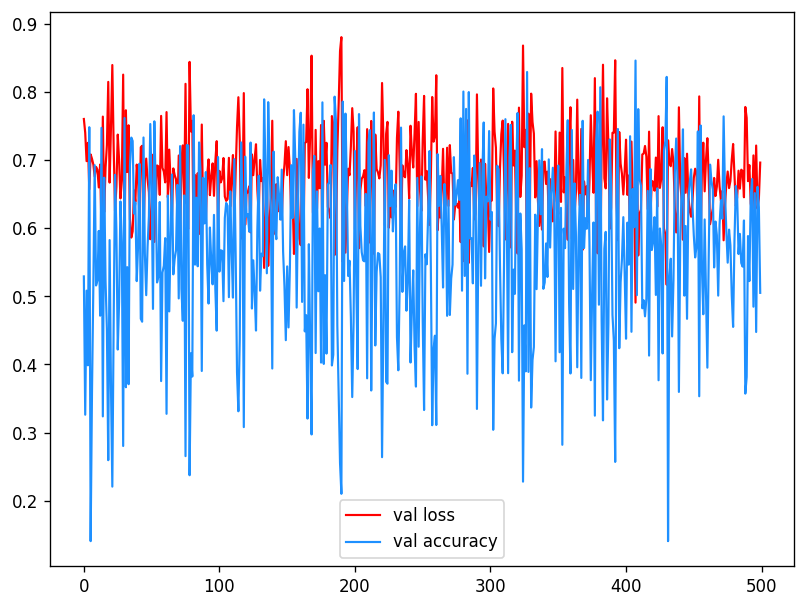

In [41]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), dpi = 120)
ax.plot(history.history['val_loss'], lw = 1.3, color = 'red', label = 'val loss')
ax.plot(history.history['val_accuracy'], lw = 1.3, color = 'dodgerblue', label = 'val accuracy')
ax.legend()
plt.show()

### Predicción del modelo

In [42]:
validation_data = pd.read_pickle("Data/validation_sample_1.pkl")

validation_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218
0,0.616277,0.5,0.0,0.000000,0.099574,0.009777,0.250000,0.777850,0.004666,0.666667,...,0.55,0.084877,0.084301,0.009744,0.85,0.053579,0.205928,0.084301,0.014128,0.0
1,0.239266,0.0,0.0,0.000189,0.391774,0.006983,0.208375,0.561785,0.001886,0.500000,...,0.50,0.027562,0.034084,0.003654,1.00,0.035562,0.118498,0.028083,0.004438,1.0
2,0.486676,0.5,0.0,0.000000,0.427581,0.000000,0.277750,0.582175,0.006553,0.500000,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,1.0
3,0.455066,0.5,0.0,NaN,0.363796,0.001397,0.096125,0.657557,0.002383,0.666667,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0
4,0.490666,0.0,0.0,0.000000,0.253376,0.009777,0.500000,0.632926,0.000000,NaN,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,1.0


In [43]:
validation_data.dtypes.value_counts()

float32     118
float64      89
category      1
category      1
category      1
category      1
category      1
category      1
category      1
object        1
category      1
category      1
category      1
dtype: int64

In [44]:
categorical_val = validation_data.select_dtypes(include = ['object', 'category']).columns

In [45]:
validation_data_copy = validation_data.copy()

In [46]:
le_2 = LabelEncoder()

In [47]:
validation_data_copy[categorical_val] = validation_data_copy[categorical_val].apply(lambda col: le_2.fit_transform(col))


In [48]:
# cols_to_drop = validation_data_copy.select_dtypes(include = ['category', 'object']).columns

# validation_data_copy.drop(columns = cols_to_drop, inplace = True)

In [49]:
nans_val = validation_data_copy.columns[validation_data_copy.isnull().any()]

In [50]:
nans_val

Index(['feature_4', 'feature_10', 'feature_15', 'feature_16', 'feature_51',
       'feature_53', 'feature_73', 'feature_74', 'feature_83', 'feature_84',
       'feature_90', 'feature_91', 'feature_92', 'feature_103', 'feature_121',
       'feature_122', 'feature_128', 'feature_131', 'feature_132',
       'feature_133', 'feature_134', 'feature_149', 'feature_151',
       'feature_153', 'feature_154', 'feature_167', 'feature_169',
       'feature_170', 'feature_172', 'feature_173', 'feature_174',
       'feature_175', 'feature_176', 'feature_177', 'feature_178',
       'feature_179', 'feature_180', 'feature_181', 'feature_182',
       'feature_183', 'feature_184', 'feature_185', 'feature_186',
       'feature_188', 'feature_190'],
      dtype='object')

In [51]:
for col in nans_val:

    validation_data_copy[col].fillna(validation_data_copy[col].mean(), inplace = True)

In [52]:
data_as_val = datos_copy.drop(columns = ['target'])

cols_as_train = data_as_val.columns

validation_data_copy = validation_data_copy[cols_as_train]

Verificamos que coincidan:

In [53]:
print(datos_copy.shape)
print(validation_data_copy.shape)

(472422, 178)
(500, 177)


In [54]:
validation_predictions = modelo.predict(validation_data_copy)

16/16 [==============================] - 0s 2ms/step


In [55]:
predicciones = np.round(validation_predictions, 5)

In [56]:
predicciones

array([[ 0.68159],
       [ 0.33928],
       [ 0.60432],
       [ 0.73092],
       [ 0.33504],
       [ 0.38732],
       [ 0.41102],
       [ 0.472  ],
       [-0.0193 ],
       [ 0.60255],
       [ 0.44542],
       [ 0.46888],
       [ 0.36919],
       [ 0.39933],
       [ 0.39507],
       [ 0.27543],
       [ 0.51899],
       [ 0.36209],
       [ 0.63004],
       [ 0.45752],
       [ 0.36154],
       [ 0.66722],
       [ 0.57687],
       [ 0.5462 ],
       [ 0.70084],
       [ 0.3635 ],
       [ 0.45225],
       [ 0.41605],
       [ 0.26237],
       [ 0.61862],
       [ 0.36821],
       [ 0.57808],
       [ 0.338  ],
       [ 0.46367],
       [ 0.36919],
       [ 0.47502],
       [ 0.77186],
       [ 0.49015],
       [ 0.42333],
       [ 0.44817],
       [ 0.2738 ],
       [ 0.51729],
       [ 0.42593],
       [ 0.35189],
       [ 0.66044],
       [ 0.30178],
       [ 0.31109],
       [ 0.69913],
       [ 0.54492],
       [ 0.75616],
       [ 0.46183],
       [ 0.3915 ],
       [ 0.5

In [57]:
y_train[0:10]

C:\Users\franz\AppData\Local\Temp\ipykernel_18848\93280641.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train[0:10]


371774    1
91534     1
410347    1
107221    1
394160    1
81218     1
308621    1
19858     1
189604    1
347911    1
Name: target, dtype: int32

In [58]:
train_predicts = modelo.predict(X_resampled)

3325/3325 [==============================] - 4s 1ms/step


In [59]:
train_predicts[0:10]

array([[0.35068095],
       [0.47298372],
       [0.53892756],
       [0.3673699 ],
       [0.41231298],
       [0.48550117],
       [0.4272926 ],
       [0.44322264],
       [0.36919045],
       [0.24812555]], dtype=float32)

In [60]:
# import statsmodels.api as sm

# from sklearn.decomposition import PCA
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import scale

In [61]:
# Entrenamiento modelo PCA con escalado de los datos

# pca_pipe = make_pipeline(StandardScaler(), PCA())
# pca_pipe.fit(datos_copy)

In [62]:
# modelo_pca = pca_pipe.named_steps['pca']

Una vez entrenado el objeto `PCA`, podemos acceder a toda la información de las componentes.

`components_` contiene el valor $\phi$ que definen a cada eigenvector. Las filas corresponden a las componentes principales (de mayor a menor).

In [63]:
# PCA = pd.DataFrame(
#     data = modelo_pca.components_,
#     columns = datos_copy.columns,
# )

In [64]:
# PCA

In [65]:
# fig, ax = plt.subplots(1, 1, figsize = (14,10))
# componentes = modelo_pca.components_
# plt.imshow(componentes.T, cmap = 'viridis', aspect = 'auto')
# plt.yticks(range(len(datos_copy.columns)), datos_copy.columns)
# plt.xticks(range(len(datos_copy.columns)), np.arange(modelo_pca.n_components_) + 1)
# plt.grid(False)
# plt.colorbar()

In [66]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor

Optimizar en cada fase hasta 4 parámetros:

Phase 1: Learning
Phase 2: Complexity
Phase 3: Regularization
Phase 4: Universal

óptimización de búsqueda bayesiana